# Video Game Sales Analysis

Welcome to all passionate of video games ! 🎮

In this notebook we will conduct an in-depth analysis of video game sales. As the video game industry is gaining increasing popularity and attracting more and more publishers, we are interested in unveiling noticeable insights about the relationship among genre, publisher, release date and sales of different titles. To this aim, we will inspect a dataset containing a list of more than 16000 video games sold from 1980 to 2020.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['figure.constrained_layout.use'] = True
import seaborn as sns
import plotly.express as px
# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
vgsales = pd.read_csv("/content/vgsales.csv")

# Exploring Dataset

In [3]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# information about vgsales
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


We notice that some Year and Publisher entries are missing. We will drop the corresponding titles and convert Year from float64 to integer for visualization purposes.

In [5]:
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# drop the few null values
vgsales.dropna(inplace=True)

# display the new number of row
vgsales.shape[0]

16291

In [7]:
# convert Year from float to int
vgsales['Year']=vgsales['Year'].astype(int)

In [8]:
# check duplicate entries
vgsales.duplicated().sum()

0

In [9]:
vgsales.nunique()

Rank            16291
Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [10]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Exploratory Data Analysis

In [11]:
vg_genre = vgsales.Genre.value_counts().reset_index()
vg_publisher = vgsales.Publisher.value_counts().reset_index()
vg_platform = vgsales.Platform.value_counts().reset_index()

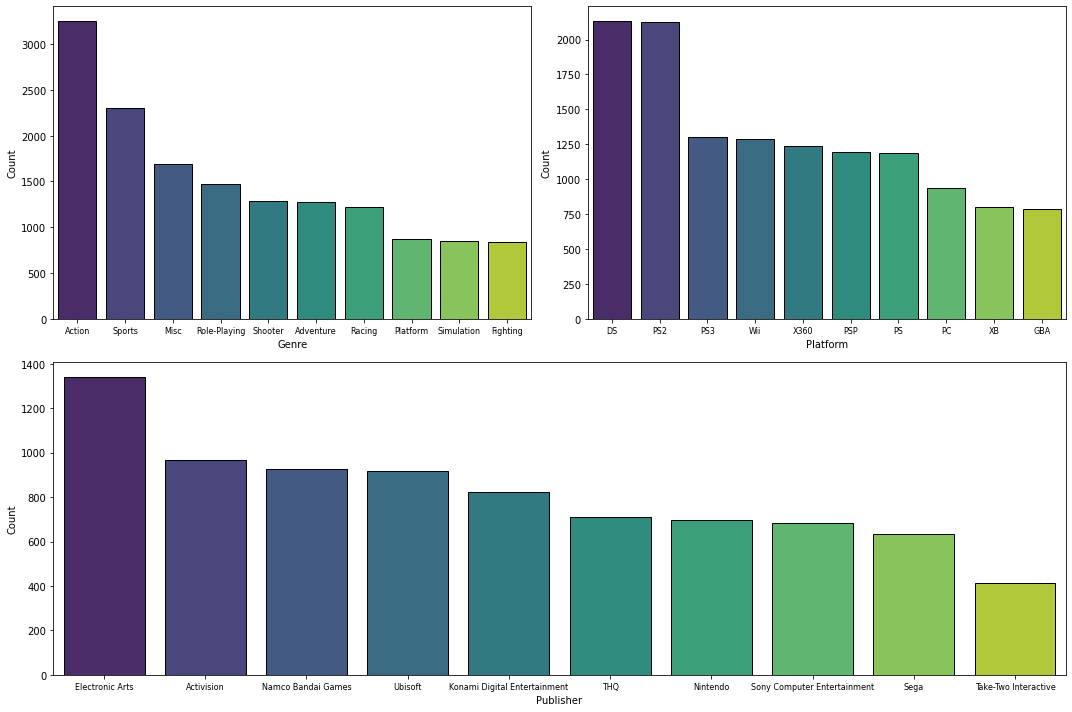

In [12]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(212)
sns.barplot(data = vg_publisher[:10],x = 'index', y='Publisher',palette='viridis',edgecolor='black')
ax1.set_xlabel('Publisher', fontsize = 10)
ax1.set_ylabel('Count', fontsize =10)
ax1.tick_params(axis='x', labelsize= 8)

ax2 = f.add_subplot(221)
sns.barplot(data = vg_genre[:10],x = 'index', y='Genre',palette='viridis',edgecolor='black')
ax2.set_xlabel('Genre', fontsize = 10)
ax2.set_ylabel('Count', fontsize =10)
ax2.tick_params(axis='x', labelsize= 8)


ax3 = f.add_subplot(222)
sns.barplot(data = vg_platform[:10],x = 'index', y='Platform',palette='viridis',edgecolor='black')
ax3.set_xlabel('Platform', fontsize = 10)
ax3.set_ylabel('Count', fontsize =10)
ax3.tick_params(axis='x', labelsize= 8)

plt.ylabel('Count')
plt.tight_layout()
plt.show()

Relationship between Genre, Platform and Publisher.

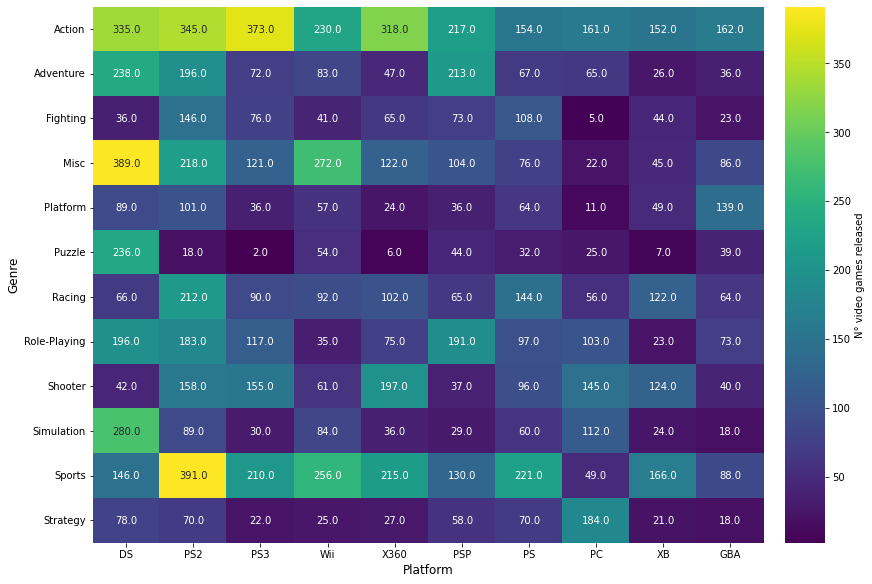

In [13]:
data=vgsales.groupby(['Platform','Genre'])['Name'].count().unstack(['Platform'])
data = data[vg_platform.values[:10,0]]
plt.figure(figsize =(12, 8))
sns.heatmap(data,
          annot=True ,fmt='.1f',
          cmap='viridis',
          cbar_kws={'label': 'N° video games released'})
plt.xlabel('Platform', fontsize = 12)
plt.ylabel('Genre', fontsize = 12)
plt.yticks(rotation=0)
plt.show()

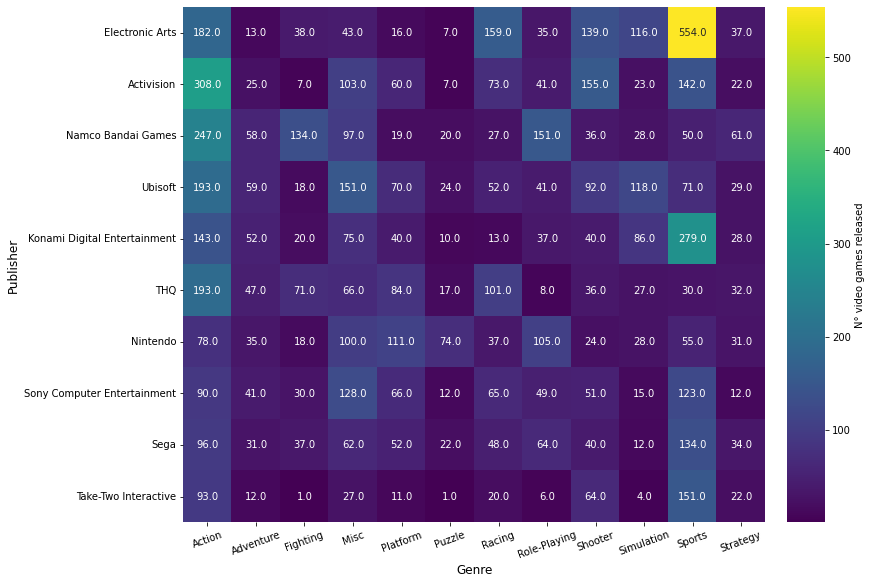

In [14]:
data=vgsales.groupby(['Publisher','Genre'])['Name'].count().unstack(['Genre'])
data = data.loc[vg_publisher.values[:10,0]]
plt.figure(figsize =(12, 8))
sns.heatmap(data,
          annot=True ,fmt='.1f',
          cmap='viridis',
          cbar_kws={'label': 'N° video games released'})
plt.xlabel('Genre', fontsize = 12)
plt.ylabel('Publisher', fontsize = 12)
plt.yticks(rotation=0)
plt.xticks(rotation=20)
plt.show()

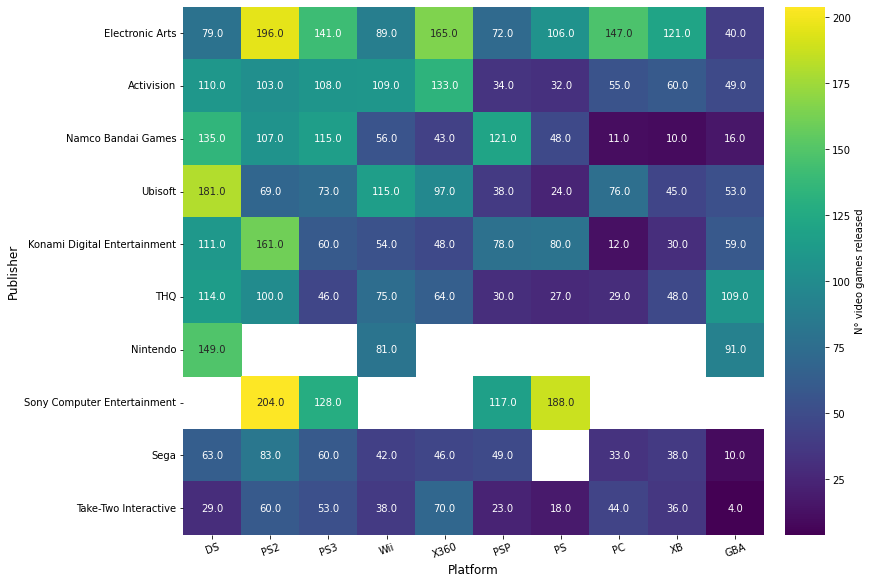

In [15]:
data=vgsales.groupby(['Publisher','Platform'])['Name'].count().unstack(['Platform'])
data = data.loc[vg_publisher.values[:10,0]]
data = data[vg_platform['index'][:10]]
plt.figure(figsize =(12, 8))
sns.heatmap(data,
          annot=True ,fmt='.1f',
          cmap='viridis',
          cbar_kws={'label': 'N° video games released'})
plt.xlabel('Platform', fontsize = 12)
plt.ylabel('Publisher', fontsize = 12)
plt.yticks(rotation=0)
plt.xticks(rotation=20)
plt.show()

# Sales Analysis

Which year had the highest Sales worldwide?

In [16]:
vg_SalesbyYear = vgsales.groupby('Year')['Global_Sales'].sum()

In [17]:
best_year = vg_SalesbyYear.idxmax() # find the Year with highest Sales
print(best_year)

2008


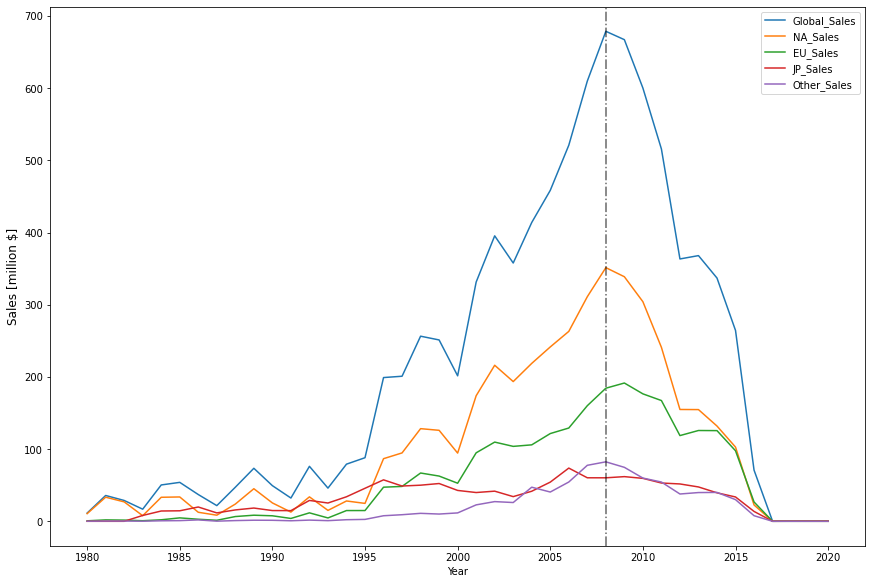

In [18]:
GSales_Year = vgsales.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
GSales_Year.plot(figsize = (12,8))
plt.axvline(x=best_year,c = 'black',linestyle = '-.',alpha = 0.6)
plt.ylabel('Sales [million $]',fontsize = 12)
plt.show()

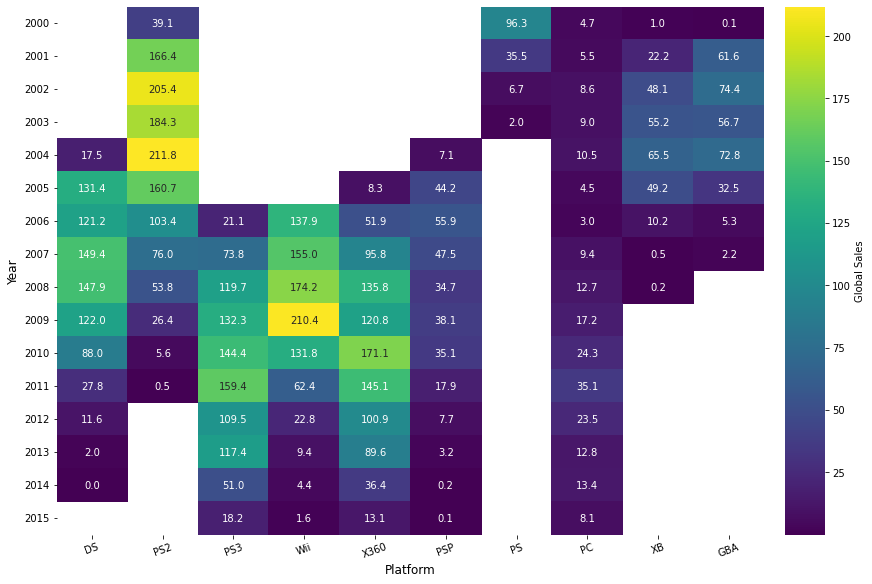

In [19]:
data=vgsales.groupby(['Year','Platform'])['Global_Sales'].sum().unstack(['Platform'])
data = data.loc[2000:2015]
data = data[vg_platform['index'][:10]]
plt.figure(figsize =(12, 8))
sns.heatmap(data,
          annot=True ,fmt='.1f',
          cmap='viridis',
          cbar_kws={'label': 'Global Sales'})
plt.xlabel('Platform', fontsize = 12)
plt.ylabel('Year', fontsize = 12)
plt.yticks(rotation=0)
plt.xticks(rotation=20)
plt.show()

Which Genre, Platform and Publisher had the highest Sales worldwide?

In [20]:
vg_sales_genre = vgsales.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()
vg_sales_publisher = vgsales.groupby('Publisher')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()
vg_sales_platform = vgsales.groupby('Platform')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()

In [21]:
vg_sales_genre = pd.DataFrame(vg_sales_genre).reset_index().sort_values(by = 'Global_Sales',ascending=False)
vg_sales_publisher = pd.DataFrame(vg_sales_publisher).reset_index().sort_values(by = 'Global_Sales',ascending=False)
vg_sales_platform = pd.DataFrame(vg_sales_platform).reset_index().sort_values(by = 'Global_Sales',ascending=False)

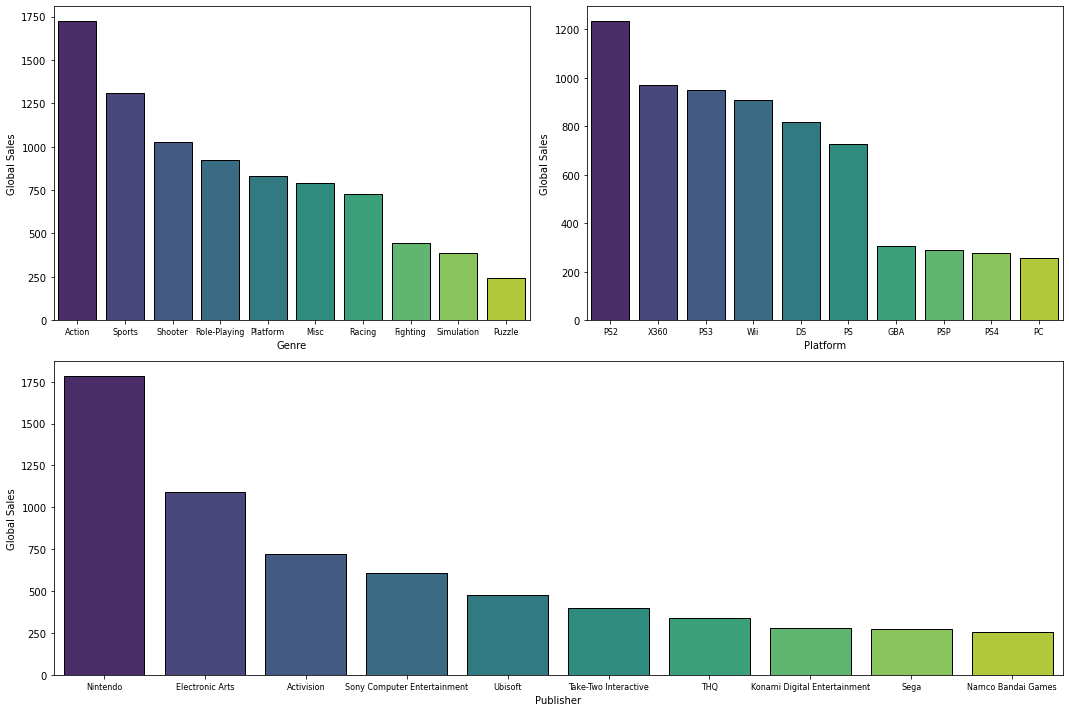

In [22]:
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(212)
sns.barplot(data = vg_sales_publisher[:10],x = 'Publisher', y='Global_Sales',palette='viridis',edgecolor='black')
ax1.set_xlabel('Publisher', fontsize = 10)
ax1.set_ylabel('Global Sales', fontsize =10)
ax1.tick_params(axis='x', labelsize= 8)

ax2 = f.add_subplot(221)
sns.barplot(data = vg_sales_genre[:10],x = 'Genre', y='Global_Sales',palette='viridis',edgecolor='black')
ax2.set_xlabel('Genre', fontsize = 10)
ax2.set_ylabel('Global Sales', fontsize =10)
ax2.tick_params(axis='x', labelsize= 8)


ax3 = f.add_subplot(222)
sns.barplot(data = vg_sales_platform[:10],x = 'Platform', y='Global_Sales',palette='viridis',edgecolor='black')
ax3.set_xlabel('Platform', fontsize = 10)
ax3.set_ylabel('Global Sales', fontsize =10)
ax3.tick_params(axis='x', labelsize= 8)

plt.tight_layout()
plt.show()


What is the region Sales by Genre, Platform and Publisher ?

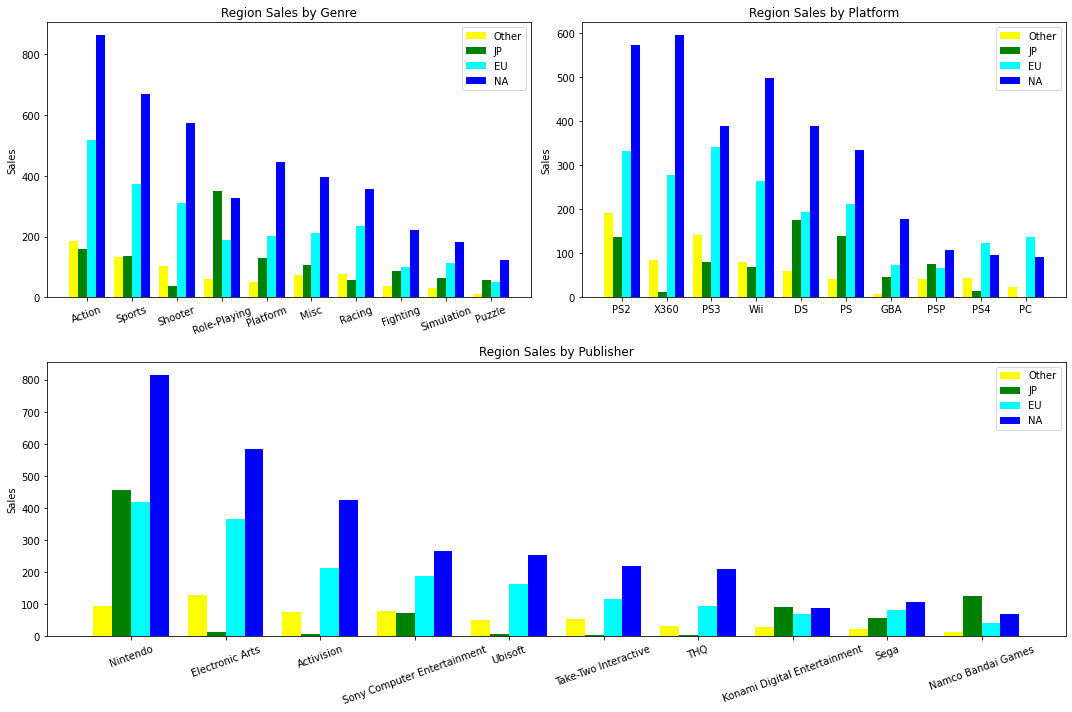

In [23]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(212)

labels = vg_sales_publisher.Publisher[:10]


Other = vg_sales_publisher.Other_Sales[:10]
JP = vg_sales_publisher.JP_Sales[:10]
EU = vg_sales_publisher.EU_Sales[:10]
NA = vg_sales_publisher.NA_Sales[:10]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax1.bar(x - 1.5*width, Other, width, label='Other',color = 'yellow')
rects2 = ax1.bar(x - width/2, JP, width, label='JP',color = 'green')
rects3 = ax1.bar(x + width/2, EU, width, label='EU',color = 'cyan')
rects4 = ax1.bar(x + 1.5*width, NA, width, label='NA',color = 'blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Sales')
ax1.set_title('Region Sales by Publisher')
ax1.set_xticks(x)
ax1.set_xticklabels(labels,rotation = 20)
ax1.legend()


ax2 = f.add_subplot(221)

labels2 = vg_sales_genre.Genre[:10]

NA = vg_sales_genre.NA_Sales[:10]
EU = vg_sales_genre.EU_Sales[:10]
Other = vg_sales_genre.Other_Sales[:10]
JP = vg_sales_genre.JP_Sales[:10]

x2 = np.arange(len(labels2))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax2.bar(x - 1.5*width, Other, width, label='Other',color = 'yellow')
rects2 = ax2.bar(x - width/2, JP, width, label='JP',color = 'green')
rects3 = ax2.bar(x + width/2, EU, width, label='EU',color = 'cyan')
rects4 = ax2.bar(x + 1.5*width, NA, width, label='NA',color = 'blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Sales')
ax2.set_title('Region Sales by Genre')
ax2.set_xticks(x2)
ax2.set_xticklabels(labels2, rotation=20)
ax2.legend()


ax3 = f.add_subplot(222)

labels3 = vg_sales_platform.Platform[:10]

NA = vg_sales_platform.NA_Sales[:10]
EU = vg_sales_platform.EU_Sales[:10]
Other = vg_sales_platform.Other_Sales[:10]
JP = vg_sales_platform.JP_Sales[:10]

x3 = np.arange(len(labels3))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax3.bar(x - 1.5*width, Other, width, label='Other',color = 'yellow')
rects2 = ax3.bar(x - width/2, JP, width, label='JP',color = 'green')
rects3 = ax3.bar(x + width/2, EU, width, label='EU',color = 'cyan')
rects4 = ax3.bar(x + 1.5*width, NA, width, label='NA',color = 'blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax3.set_ylabel('Sales')
ax3.set_title('Region Sales by Platform')
ax3.set_xticks(x3)
ax3.set_xticklabels(labels3)
ax3.legend()

plt.tight_layout()
plt.show()

# Conclusion

In this notebook, we have consolidated our understanding of the video game industry by conducting an exploratory data analysis of the Kaggle Dataset. We have found interesting patterns between *Genre*, *Publisher* and *Platform* of the most popular and top-released and top-selling titles.